In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

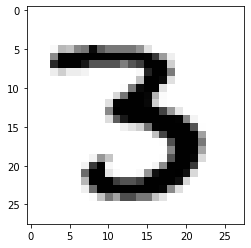

In [4]:
plt.imshow(x_train[12], cmap = "Greys")

In [5]:
y_train[12]

3

In [6]:
x_train[1].shape

(28, 28)

#### CNN吃圖要3個channel(R,G,B)，但目前只有2個(28,28)，因此要reshape成(28,28,1)，1是灰階的意思

In [7]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [8]:
from keras.utils import np_utils

In [9]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [10]:
y_train[11]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

In [13]:
model = Sequential()

### 4>幾個filter，(3,3)>>3X3的大小，padding='same'>>空的補零
Maxpooling不一定要


# 1

In [14]:
model.add(Conv2D(4, (5, 5), padding='same', input_shape=(28, 28, 1),
                activation='relu'))

In [15]:
model.add(MaxPool2D(pool_size=(2,2)))

# 2

In [16]:
model.add(Conv2D(8, (4, 4), padding='same', input_shape=(28, 28, 1),
                activation='relu'))

In [17]:
model.add(MaxPool2D(pool_size=(2,2)))

# 3

In [18]:
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(28, 28, 1),
                activation='relu'))

In [19]:
model.add(MaxPool2D(pool_size=(2,2)))

# 4
Dense層

In [20]:
model.add(Flatten())
model.add(Dense(12, activation='relu'))

In [21]:
model.add(Dense(11, activation='relu'))

output

In [22]:
model.add(Dense(10, activation='softmax'))

組裝

In [23]:
model.compile(loss='mse', optimizer=SGD(lr=0.07), metrics=['accuracy'])

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         520       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
__________

In [32]:
5*5*4 + 4    #有4層5x5filter

104

In [34]:
4*4*4*8 + 8    #有8層4x4filter，對4張做

520

In [29]:
model.fit(x_train, y_train, batch_size=100, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.0102 - acc: 0.9335
Epoch 2/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.0095 - acc: 0.9379
Epoch 3/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.0090 - acc: 0.9415
Epoch 4/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.0085 - acc: 0.9450
Epoch 5/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.0081 - acc: 0.9467
Epoch 6/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.0078 - acc: 0.9495
Epoch 7/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.0075 - acc: 0.9513
Epoch 8/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.0072 - acc: 0.9531
Epoch 9/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.0070 - acc: 0.9543
Epoch 10/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.0067 - acc: 0.9558

In [30]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 345us/step


In [31]:
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]}')

測試資料的 loss: 0.00395
測試資料的正確率: 0.9739


In [77]:
model.save('myCNNmodel.h5')

In [78]:
del model

In [79]:
from keras.models import load_model

In [80]:
model = load_model('myCNNmodel.h5')

In [81]:
predict = model.predict_classes(x_test)

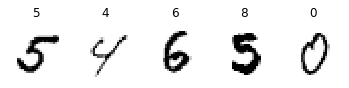

In [83]:
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")